# EDA on COVID-19 Global Cases Dataset(the dataset was taken from kaggle)


### Libraries Used:
- pandas
- matplotlib
- seaborn


In [11]:
# Imports the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
# Loads the dataset
df = pd.read_csv('synthetic_covid19_data.csv')  
df.head()

,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
0,2021-11-19,Asia,India,6423388,2490,107051,323,60016385,7386,0.904377,...,69.259331,1241418161,67.394702,49.883751,8.649395,16.052063,44313.199955,20.827286,177.832655,16.296474
1,2021-09-12,North America,Russia,6550634,6980,481184,697,28666409,6862,0.525850,...,7.185287,114516392,694.409929,30.126823,8.957854,4.423022,8196.945011,20.478579,470.991420,8.579170
2,2020-04-20,Europe,Canada,4304572,9134,15116,325,80352550,40108,0.791575,...,14.823246,1152898402,784.464729,22.648063,9.336778,18.776372,52607.000057,11.924664,415.880908,14.989789
3,2022-10-16,Asia,Germany,2234489,7661,20045,624,89212990,91788,0.115291,...,70.007502,1342525124,403.467508,42.951109,5.321894,10.526520,23297.985037,4.591400,643.510444,18.084096
4,2021-05-15,Europe,USA,9958614,1724,419543,824,5364240,75023,0.927643,...,28.972334,744943966,182.869692,26.414731,19.321761,15.889173,56126.828895,5.431330,451.846790,5.971409


In [3]:
# Checks for data info and null values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     3000 non-null   object 
 1   continent                3000 non-null   object 
 2   location                 3000 non-null   object 
 3   total_cases              3000 non-null   int64  
 4   new_cases                3000 non-null   int64  
 5   total_deaths             3000 non-null   int64  
 6   new_deaths               3000 non-null   int64  
 7   total_tests              3000 non-null   int64  
 8   new_tests                3000 non-null   int64  
 9   positive_rate            3000 non-null   float64
 10  tests_per_case           3000 non-null   float64
 11  total_vaccinations       3000 non-null   int64  
 12  people_vaccinated        3000 non-null   int64  
 13  people_fully_vaccinated  3000 non-null   int64  
 14  hosp_patients           

date                       0
continent                  0
location                   0
total_cases                0
new_cases                  0
total_deaths               0
new_deaths                 0
total_tests                0
new_tests                  0
positive_rate              0
tests_per_case             0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
hosp_patients              0
icu_patients               0
reproduction_rate          0
stringency_index           0
population                 0
population_density         0
median_age                 0
aged_65_older              0
aged_70_older              0
gdp_per_capita             0
extreme_poverty            0
cardiovasc_death_rate      0
diabetes_prevalence        0
dtype: int64

In [ ]:
# Drops duplicates 
df.drop_duplicates(inplace=True)
# Shows basic statistics
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
count,3.000000e+03,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.00000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,...,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,4.970822e+06,4933.382667,252170.073000,501.944333,4.990409e+07,49176.34200,0.502899,246.313132,5.054665e+07,3.944236e+07,...,49.420508,7.000848e+08,504.417978,34.954233,14.947891,11.385179,35872.847690,25.096407,452.949274,10.436695
std,2.840551e+06,2862.387046,142288.916742,286.865451,2.938662e+07,29335.17051,0.286454,142.898800,2.888088e+07,2.314784e+07,...,28.926971,4.085710e+08,287.992252,8.678754,5.777631,4.903229,19925.718629,14.343835,202.618334,5.423249
min,1.729700e+04,1.000000,74.000000,0.000000,4.212000e+03,5.00000,0.000119,0.087758,4.554000e+03,6.170000e+02,...,0.010237,1.110996e+06,10.588810,20.000502,5.001872,3.001780,1026.731495,0.056399,100.005903,1.011965
25%,2.602631e+06,2518.500000,131482.500000,252.750000,2.414482e+07,22645.25000,0.253634,121.780384,2.499653e+07,1.881256e+07,...,24.258523,3.408214e+08,258.464713,27.473284,9.825665,7.131367,18274.354626,13.076350,278.907744,5.905785
50%,4.944837e+06,4843.500000,255026.000000,506.000000,5.045845e+07,49491.50000,0.509628,244.688678,5.187611e+07,3.994068e+07,...,49.527373,6.956387e+08,499.912506,34.892248,14.897659,11.363021,36849.521790,24.942092,455.707196,10.179357
75%,7.356497e+06,7381.250000,373209.500000,749.000000,7.490383e+07,75177.50000,0.746760,364.518071,7.551452e+07,5.936983e+07,...,74.679065,1.057497e+09,757.980516,42.511328,20.054738,15.585339,52862.615194,37.605693,631.834708,15.075605
max,9.993726e+06,9993.000000,499920.000000,998.000000,9.992758e+07,99987.00000,0.999893,499.361627,9.998511e+07,7.998922e+07,...,99.980848,1.398727e+09,998.762017,49.999164,24.999139,19.994429,69989.049734,49.988448,799.957787,19.994108


In [ ]:
# Number of unique locations(countries):
df['location'].nunique()

10

In [6]:
# Top 10 most affected countries by total cases
top_countries = df.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)
top_countries

location
Germany    9993726
Canada     9992154
Japan      9991183
UK         9988400
France     9983526
USA        9973006
Italy      9963441
India      9957168
Brazil     9953678
Russia     9886226
Name: total_cases, dtype: int64

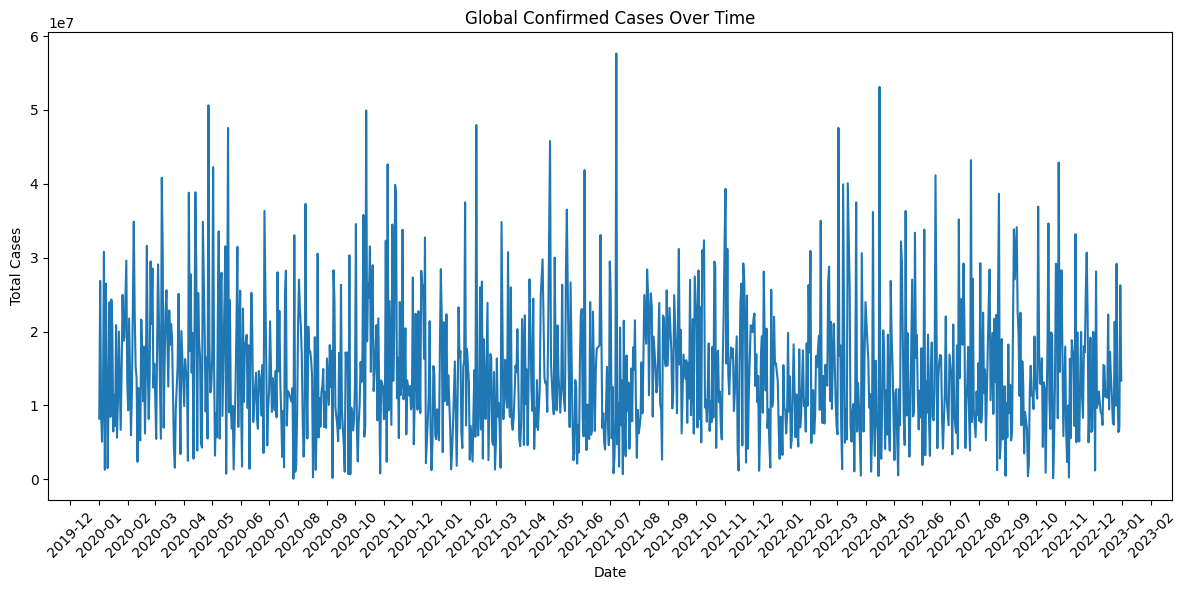

In [ ]:
df['date'] = pd.to_datetime(df['date'])#this ensures that date is in datetime format

# Group by date and sum total cases
df_grouped = df.groupby('date')['total_cases'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='date', y='total_cases')
plt.title('Global Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # year-month format
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

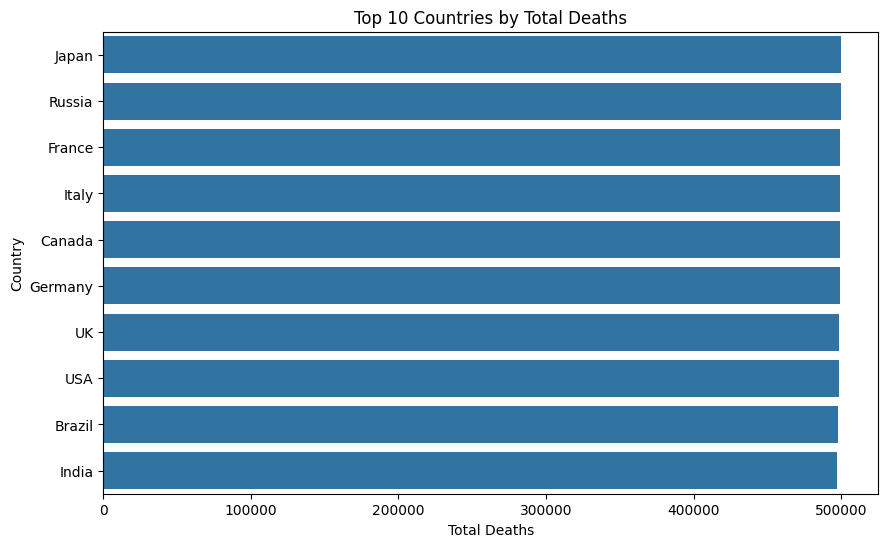

In [8]:
# Bar chart of top 10 countries with highest deaths
top_deaths = df.groupby('location')['total_deaths'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_deaths.values, y=top_deaths.index)
plt.title('Top 10 Countries by Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.show()

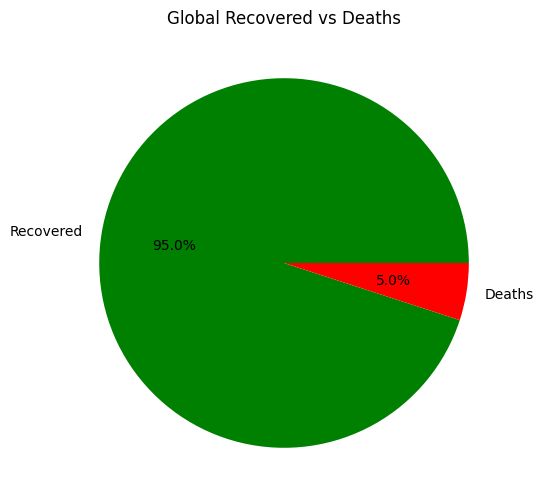

In [9]:
# Pie chart of global recovered vs deaths 
global_deaths = df['total_deaths'].max()
global_cases = df['total_cases'].max()
global_recovered = global_cases - global_deaths  

plt.figure(figsize=(6,6))
plt.pie([global_recovered, global_deaths], labels=['Recovered', 'Deaths'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Global Recovered vs Deaths')
plt.show()

### My Observations:
 1) The dataset contains COVID-19 statistics across multiple countries.
 2) Some countries report significantly higher cases and deaths.
 3) Global confirmed cases have shown an increasing trend over time.
 4) Pie chart gives a rough estimate of recovery vs mortality globally.
